# Building a single tree

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_diabetes = pd.read_csv('diabetes_csv.csv')

FileNotFoundError: File b'diabetes_csv.csv' does not exist

In [3]:
df_diabetes

NameError: name 'df_diabetes' is not defined

This directory contain a data set prepared for the use of participants
for the 1994 AAAI Spring Symposium on Artificial Intelligence in Medicine.

768 cases, 8 variables (observation on patients who might have diabetes) and 2 classes (tested_positive or tested_negative)

In [4]:
### Y is the category column and X is the matrix with all other columns
X = df_diabetes.values[:, 0:7]
Y = df_diabetes.values[:,8]#.astype('category')

NameError: name 'df_diabetes' is not defined

In [9]:
### Viewing the Classification Column mapped to values
df_diabetes.iloc[0]

preg                   6
plas                 148
pres                  72
skin                  35
insu                   0
mass                33.6
pedi               0.627
age                   50
class    tested_positive
Name: 0, dtype: object

In [25]:
### Number of unique classes (Y values)
print(np.unique(Y))
len(np.unique(Y))

['tested_negative' 'tested_positive']


2

In [26]:
X

array([[6, 148, 72, ..., 0, 33.6, 0.627],
       [1, 85, 66, ..., 0, 26.6, 0.35100000000000003],
       [8, 183, 64, ..., 0, 23.3, 0.672],
       ...,
       [5, 121, 72, ..., 112, 26.2, 0.245],
       [1, 126, 60, ..., 0, 30.1, 0.349],
       [1, 93, 70, ..., 0, 30.4, 0.315]], dtype=object)

In [38]:
i_max = 100 # length of matrix (number repeats)
j_max = 50 # width of matrix (bootstrap replicates)

In [39]:
# err_0 is the base (without bagging)
cases = len(df_diabetes)
err_0 = np.zeros((i_max,1)) #ToDo just confirm
for i in range(i_max):
    
    for j in range(1):
        print(i, j, end="\r")
        df_to_use_sample = df_diabetes
        X = df_to_use_sample.values[:, 0:7]
        Y = df_to_use_sample.values[:, 8]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with rounded mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        col_means = np.nanmean(X_train, axis=0)
        inds = np.where(np.isnan(X_train))
        X_train[inds] = np.take(col_means, inds[1])
        ### Rounding, because all values are categorical, not numerical
        col_means = np.round(np.nanmean(X_test, axis=0))
        inds = np.where(np.isnan(X_test))
        X_test[inds] = np.take(col_means, inds[1])
        
        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier()
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                err_0[i,j] = err_0[i,j] + 1
        err_0[i,j]= err_0[i,j]/len(y_test)

In [40]:
### Viewing the base
err_0

array([[0.32900433],
       [0.26406926],
       [0.32900433],
       [0.34632035],
       [0.29437229],
       [0.26839827],
       [0.31601732],
       [0.32467532],
       [0.29437229],
       [0.34632035],
       [0.31168831],
       [0.27272727],
       [0.29004329],
       [0.35497835],
       [0.32900433],
       [0.30735931],
       [0.41991342],
       [0.25108225],
       [0.33333333],
       [0.34632035],
       [0.32900433],
       [0.32034632],
       [0.32467532],
       [0.38095238],
       [0.2987013 ],
       [0.32900433],
       [0.36796537],
       [0.33766234],
       [0.35497835],
       [0.36796537],
       [0.31168831],
       [0.35497835],
       [0.28138528],
       [0.28571429],
       [0.34632035],
       [0.27705628],
       [0.32900433],
       [0.32467532],
       [0.36363636],
       [0.38095238],
       [0.31168831],
       [0.28138528],
       [0.31601732],
       [0.34632035],
       [0.31601732],
       [0.32034632],
       [0.38528139],
       [0.290

In [41]:
# err is the method in the paper with bagging
cases = len(df_diabetes)
err = np.zeros((i_max,j_max))
for i in range(i_max):
    
    for j in range(j_max):
        print(i, j, end="\r")
        df_to_use_sample = df_diabetes.sample(n=cases, replace=True)
        X = df_to_use_sample.values[:, 0:7]
        Y = df_to_use_sample.values[:, 8]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        col_means = np.nanmean(X_train, axis=0)
        inds = np.where(np.isnan(X_train))
        X_train[inds] = np.take(col_means, inds[1])
        ### Rounding, because all values are categorical, not numerical
        col_means = np.round(np.nanmean(X_test, axis=0))
        inds = np.where(np.isnan(X_test))
        X_test[inds] = np.take(col_means, inds[1])
        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier()
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                err[i,j] = err[i,j] + 1
        err[i,j]= err[i,j]/len(y_test)

In [42]:
### Viewing err
err

array([[0.15584416, 0.15151515, 0.12554113, ..., 0.17748918, 0.12987013,
        0.11255411],
       [0.12554113, 0.19047619, 0.12554113, ..., 0.16017316, 0.12987013,
        0.16883117],
       [0.17316017, 0.2034632 , 0.16450216, ..., 0.15584416, 0.16017316,
        0.14718615],
       ...,
       [0.19480519, 0.16450216, 0.18614719, ..., 0.12554113, 0.14285714,
        0.0995671 ],
       [0.16450216, 0.22943723, 0.12121212, ..., 0.14718615, 0.16017316,
        0.14285714],
       [0.12554113, 0.16450216, 0.16017316, ..., 0.18181818, 0.12554113,
        0.17316017]])

The paper found 23.4% for err0 and 18.8% for err, which is the improvement from bagging

0.32008658008658003


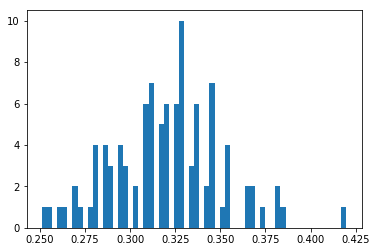

In [43]:
print(err_0.mean())
plt.hist(err_0, bins = 60)
plt.show()

0.15646666666666664


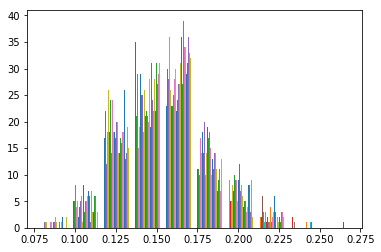

In [44]:
print(err.mean())
import matplotlib.pyplot as plt
plt.hist(err)
plt.show()

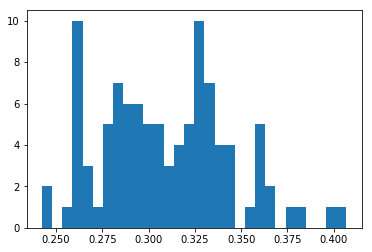

In [35]:
plt.hist(np.concatenate(err_0), bins = 30)
plt.show()

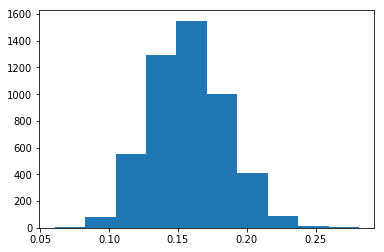

In [36]:
plt.hist(np.concatenate(err))
plt.show()

/Users/francescoetzer/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


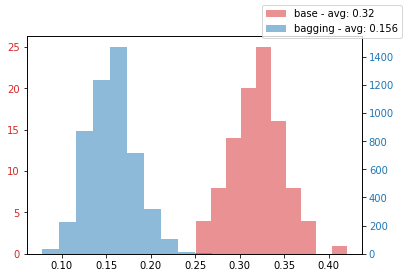

In [45]:
fig, ax1 = plt.subplots()
ax1.hist(np.concatenate(err_0), color='tab:red', alpha=0.5, label='base - avg: {}'.format(round(err_0.mean(), 3)))
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.hist(np.concatenate(err),alpha=0.5, label='bagging - avg: {}'.format(round(err.mean(), 3)))
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='upper right')
fig.show()